In [35]:
"""
Perceptron from Scratch (Pure Python)

This module implements a single artificial neuron trained using the
Perceptron learning rule, without relying on external machine learning libraries.

The perceptron is one of the earliest and most fundamental models in neural
computation (Rosenblatt, 1957), and serves as the building block for modern
deep neural networks.

Mathematical formulation:

    Linear model:
        z = Σ (w_i * x_i) + b
          = w · x + b

    Activation function:
        a = step(z)

    Learning rule:
        w ← w + η * error * x
        b ← b + η * error

Where:
    x ∈ Rⁿ : input vector
    w ∈ Rⁿ : weight vector
    b ∈ R  : bias term
    z ∈ R  : linear output (logit)
    a ∈ {0,1} : binary activation
    η ∈ R  : learning rate

Objective:
    Learn a linear decision boundary that separates one specific binary pattern
    from all other patterns.

This implementation demonstrates the full supervised learning pipeline:
    Forward pass → Loss computation → Parameter update → Convergence

Author: Marcos Júnior Lemes Ferreira
License: MIT
"""

# ============================================================
# MODEL DEFINITION
# ============================================================

def neuron(inputs, weights, bias):
    """
    Computes the linear output of a perceptron.

    This corresponds to the affine transformation:

        z = w · x + b

    Parameters
    ----------
    inputs : list[float]
        Input feature vector (x)

    weights : list[float]
        Model parameters (w)

    bias : float
        Bias parameter (b)

    Returns
    -------
    float
        Linear output (z), before activation
    """

    z = 0.0

    for w_i, x_i in zip(weights, inputs):
        z += w_i * x_i

    z += bias

    return z


# ============================================================
# ACTIVATION FUNCTION
# ============================================================

def step_function(z):
    """
    Binary step activation function.

    Implements a threshold at zero:

        a = 1 if z > 0
        a = 0 otherwise

    This converts the linear model into a binary classifier.

    Parameters
    ----------
    z : float
        Linear output

    Returns
    -------
    int
        Binary prediction
    """

    return 1 if z > 0 else 0


# ============================================================
# DATASET DEFINITION
# ============================================================

"""
Training dataset.

The task is to learn to recognize a single target pattern:

    target = [0,1,0,0,0,0,0,0,0,0]

All other patterns are treated as negative examples.

This creates a linearly separable binary classification problem.
"""

training_data = [

    # Positive example (target class)
    ([0,1,0,0,0,0,0,0,0,0], 1),

    # Negative examples
    ([1,1,1,1,1,1,1,1,1,1], 0),
    ([0,0,0,1,1,1,1,1,1,1], 0),
    ([1,0,0,0,0,0,0,0,0,0], 0),
    ([0,0,1,0,0,0,0,0,0,0], 0),

]


# ============================================================
# PARAMETER INITIALIZATION
# ============================================================

"""
Initialize parameters to zero.

This is sufficient for the perceptron algorithm because convergence is
guaranteed for linearly separable data.
"""

weights = [0.0] * 10
bias = 0.0


# ============================================================
# TRAINING CONFIGURATION
# ============================================================

learning_rate = 0.1
max_epochs = 100


# ============================================================
# TRAINING LOOP (PERCEPTRON LEARNING RULE)
# ============================================================

print("Training started\n")

for epoch in range(max_epochs):

    total_error = 0

    for inputs, target in training_data:

        # Forward pass
        z = neuron(inputs, weights, bias)

        prediction = step_function(z)

        # Classification error
        error = target - prediction

        total_error += abs(error)

        # Parameter update
        for i in range(len(weights)):
            weights[i] += learning_rate * error * inputs[i]

        bias += learning_rate * error


    # Monitoring convergence
    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Total error: {total_error}")


    # Early stopping condition (perfect classification)
    if total_error == 0:
        print(f"\nConverged at epoch {epoch}")
        break


# ============================================================
# TRAINING RESULTS
# ============================================================

print("\nTraining complete\n")

print("Learned weights:")
print([round(w, 4) for w in weights])

print("\nLearned bias:")
print(round(bias, 4))


# ============================================================
# EVALUATION ON UNSEEN DATA
# ============================================================

"""
Evaluate generalization on unseen samples.

Note:
    The perceptron can only learn linearly separable patterns.
    Its generalization capacity is limited compared to modern neural networks.
"""

test_data = [

    ([0,1,0,0,0,0,0,0,0,0], "Target pattern (expected: 1)"),

    ([1,1,1,1,1,1,1,1,1,1], "Uniform pattern (expected: 0)"),

    ([0,0,0,1,1,1,1,1,1,1], "Non-target pattern (expected: 0)"),

    ([1,0,0,0,0,0,0,0,0,0], "Non-target pattern (expected: 0)"),

    ([0,0,0,0,0,0,0,0,0,0], "Unseen pattern"),
]


print("\nEvaluation:\n")

for inputs, description in test_data:

    z = neuron(inputs, weights, bias)

    prediction = step_function(z)

    print(f"Input:      {inputs}")
    print(f"Prediction: {prediction}")
    print(f"Case:       {description}\n")

# ============================================================
# SUMMARY
# ============================================================

"""
This experiment demonstrates:

• Linear model representation
• Binary classification using a perceptron
• Supervised learning
• Gradient-free parameter updates
• Convergence on linearly separable data

Limitations:

• Cannot learn non-linear decision boundaries
• Extremely limited generalization
• Serves only as a foundational model

This same core principle scales to modern architectures such as:

• Multi-layer perceptrons
• Convolutional neural networks
• Transformers

All deep learning models are compositions of affine transformations
and non-linear activation functions.
"""


Training started

Epoch 000 | Total error: 2

Converged at epoch 2

Training complete

Learned weights:
[-0.1, 0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

Learned bias:
0.1

Evaluation:

Input:      [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Prediction: 1
Case:       Target pattern (expected: 1)

Input:      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Prediction: 0
Case:       Uniform pattern (expected: 0)

Input:      [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Prediction: 0
Case:       Non-target pattern (expected: 0)

Input:      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Prediction: 0
Case:       Non-target pattern (expected: 0)

Input:      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Prediction: 1
Case:       Unseen pattern



'\nThis experiment demonstrates:\n\n• Linear model representation\n• Binary classification using a perceptron\n• Supervised learning\n• Gradient-free parameter updates\n• Convergence on linearly separable data\n\nLimitations:\n\n• Cannot learn non-linear decision boundaries\n• Extremely limited generalization\n• Serves only as a foundational model\n\nThis same core principle scales to modern architectures such as:\n\n• Multi-layer perceptrons\n• Convolutional neural networks\n• Transformers\n\nAll deep learning models are compositions of affine transformations\nand non-linear activation functions.\n'

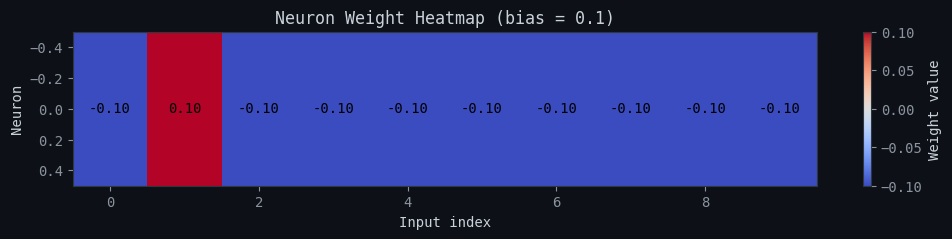

In [36]:
# ============================================================
# HEATMAP VISUALIZATION OF NEURON WEIGHTS
# ============================================================

import matplotlib.pyplot as plt

def visualize_weights(weights, bias):
    """
    Visualizes neuron weights as a heatmap.

    Red   → strong positive influence
    Blue  → negative influence
    White → neutral
    """

    # Transform into 2D for heatmap (1 row, N columns)
    weight_matrix = [weights]

    plt.figure(figsize=(12, 2))

    plt.imshow(weight_matrix, cmap="coolwarm", aspect="auto")

    plt.colorbar(label="Weight value")

    plt.title(f"Neuron Weight Heatmap (bias = {round(bias, 3)})")

    plt.xlabel("Input index")
    plt.ylabel("Neuron")

    # Show weight values
    for i, w in enumerate(weights):
        plt.text(i, 0, f"{w:.2f}",
                 ha="center",
                 va="center",
                 color="black")
    plt.show()

# Call visualization
visualize_weights(weights, bias)

